제약 사항
*   제공한 라이브러리 사용
*   주석으로 코드 설명

참조 페이지

* https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

* https://matplotlib.org/stable/tutorials/introductory/images.html

* https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

* https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

* https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 1) 제공된 사진 2장을 불러오고 시각화하기

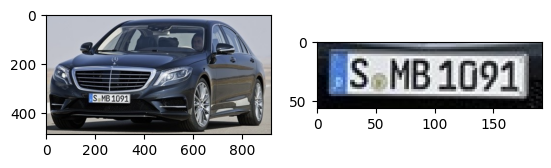

In [ ]:
car_img = cv2.imread('./1.png')
license_img = cv2.imread('./2.png')

# write your code here
#OpenCV라이브러리를 이용하여 BGR to RGB로 변환하기.
car_img_1 = cv2.cvtColor(car_img, cv2.COLOR_BGR2RGB)
license_img_1 = cv2.cvtColor(license_img, cv2.COLOR_BGR2RGB)
#car_img, license_im는 cv2로 읽어옴 -> OpenCV의 색상포맷인 BRG(blue, red, green)을 사용한다.
#plt.show()를 활용하여 사진을 시각화하고싶으므로 Matplotlib의 색상포맷인 RGB포맷으로 변환하는 과정이다

"""plt.imshow(car_img_1)
plt.imshow(license_img_1)"""
#단순하게 출력해보니 사진 하나만 출력됨
#        -> 단일 플롯에 두개의 이미지를 그리기 위해 플롯을 1*2 행렬로 설정하기

fig = plt.figure() #단일 그림이 아님. figure함수를 사용해서 여러개의 그림을 동시에 그리기
ax1 = fig.add_subplot(1, 2, 1) #fig에 subplot 추가(1행 2열의 첫번째 위치에 생성하기)
ax1.imshow(car_img_1) #ax1라는 축에 car_img_1 표시하기

ax2 = fig.add_subplot(1, 2, 2) #fig에 subplot 추가(1행 2열의 두번째 위치에 생성하기)
ax2.imshow(license_img_1) #ax2라는 축에 license_img_1 표시하기

plt.show()
#참고 사이트: https://foss4g.tistory.com/1263

## 2) 제공한 차 사진을 template 삼아 차사진에서 번호판(top_left) 출력하기

In [ ]:
# Use template matching
# write your code here

#템플릿 매칭: 하나의 큰 이미지에서 작은 이미지(패턴)이 어디에 위치하는지 찾는 방법
img = cv2.imread('./1.png', cv2.IMREAD_GRAYSCALE)
#RGB채널을 이용하면 처리해야하는 데이터가 많아지므로 grayscale을 이용하여
#밝기로 픽셀을 구분하기 -> 속도 증가, 효율 증대
img2 = img.copy() #원본사진 대신 복사본으로 이미지 시험하기
template = cv2.imread('./2.png', cv2.IMREAD_GRAYSCALE)
w, h = template.shape[::-1] #템플릿 크기 저장하기

#템플릿 매칭 방법 리스트로 저장하기
#          상관계수 계산     상관계수를 정규화     크로스코릴레이션     크/코 정규화       제곱차이합 계산     제곱차이합 정규화
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
  img = img2.copy()
  method = eval(meth) #eval(): 문자열로 표현된 meth를 python표현식으로

  #선택된 method로 img에서 template와 일치하는 위치를 찾기
  res = cv2.matchTemplate(img,template,method)
  #matchTemplate()는 res(매칭결과 행렬)을 반환함
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  #res에서 최소, 최대값과 그 위치 찾기

  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
    #만약 제곱차이합 계산 관련 메소드라면 매칭점수가 가장 낮은 min_loc이 최선의 매치가됨
    #        -> 최소 위치를 top_left로 선택하기
  else:
    top_left = max_loc #그 외의 경우는 매칭점수가 높을 수록 좋은 매치를 의미하므로 max_loc이 top_left
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # 템플릿의 오른쪽 하단 위치 계산하기


print("표지판 위치: ", top_left)
#참고 사이트: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

표지판 위치:  (164, 314)


## 3) 제공된 차 사진에 번호판 위치 사각형으로 표시하기

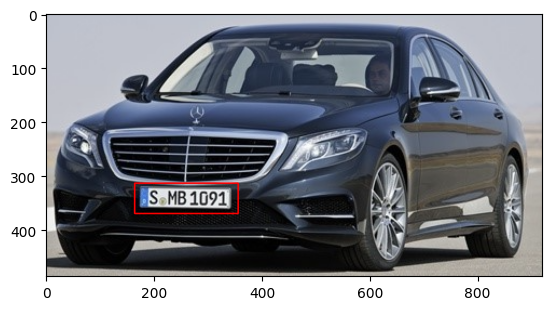

In [ ]:
# write your code here
img_rgb = cv2.imread('./1.png')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB) #plt로 사진 표시할거니까 색상포맷 바꿔주기
cv2.rectangle(img_rgb,top_left, bottom_right, 255, 2) #이미지에 직사각형 그리기

plt.imshow(img_rgb)
plt.show()
#참고 사이트: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

## 4) SIFT 서술자 추출기 생성, 각 사진에 대해 키 포인트와 서술자 추출

In [ ]:
image_1 = cv2.imread('./3.png')
image_2 = cv2.imread('./4.png')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

In [ ]:
# ORB 서술자 추출기 생성
detector = cv2.ORB_create()

# 각 영상에 대해 키 포인트와 서술자 추출
key_point1, desc1 = detector.detectAndCompute(gray_1,None)
key_point2, desc2 = detector.detectAndCompute(gray_2,None)

## 5) BFMatcher 생성, Hamming 거리 상호체크 후 매칭 계산

In [ ]:
# BFMatcher 생성, Hamming 거리, 상호 체크
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# 매칭 계산
matches = matcher.match(desc1,desc2)
matches = sorted(matches, key = lambda x:x.distance) #거리기준으로 정렬하기
res = cv2.drawMatches(image_1,key_point1,image_2, key_point2,matches[:100],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#image_1은 특징점들이 검출된 원본이미지, key_point1은 image_1에서 검출된 특징점 리스트
#image_2은 특징점들이 검출된 원본이미지, key_point2은 image_2에서 검출된 특징점 리스트
#두 이미지간의 특징점 매칭 결과를 나타내는 리스트인 matches리스트에서 100개의 매칭결과만 사용해보기
# flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS: 매칭되지 않은 특징점은 표시하지 않는 옵션

## 6) 매칭결과 그리기

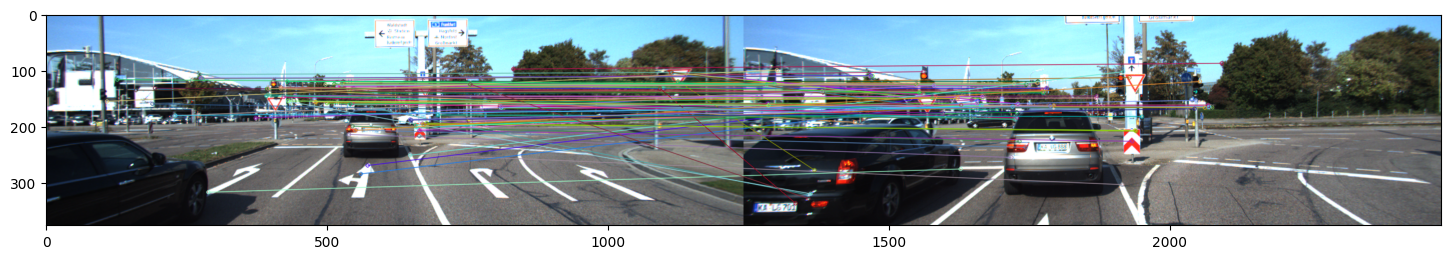

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(res)
plt.show()

## 7) FlannBasedMatcher 사용

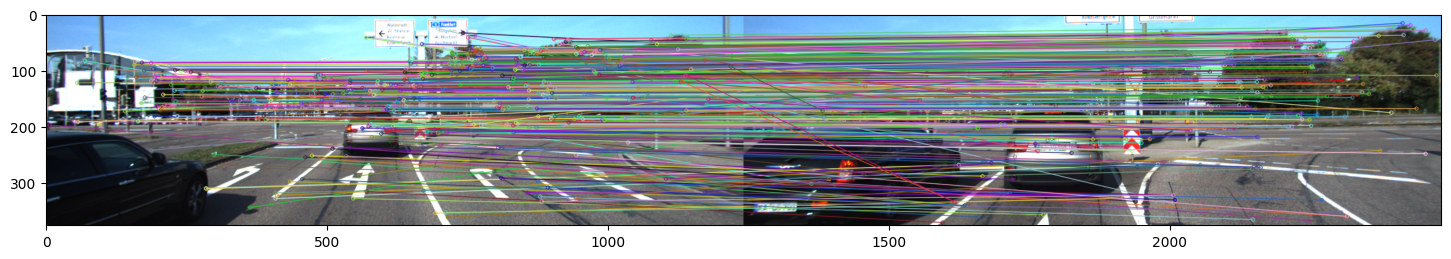

In [ ]:
# FLANN 매처 파라미터 설정
# FLANN 기반 매처 생성
FLANN_INDEX_KDTREE = 1 #KD-Tree인덱싱 방법을 사용하는 것을 나타내는 인덱스값
#                         ㄴ> k차원 공간에서 나누어 저장하는 자료구조
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#                                                       ㄴ> KD-Tree를 몇개 생성할지 지정
search_params = dict(checks=50) #검색 매개변수 설정
flann = cv2.FlannBasedMatcher(index_params,search_params) #매처 생성

# sift 추출기 생성
sift = cv2.SIFT_create()

# 각 이미지에 대해 키 포인트와 서술자 추출
kp1, des1 = sift.detectAndCompute(image_1,None)
kp2, des2 = sift.detectAndCompute(image_2,None)

#FLANN matcher를 사용하여 image_1, image_2의 des1, des2 간의 knn 매칭 수행하기, 군집은 2개로 지정
matches = flann.knnMatch(des1,des2,k=2)

# 매칭에 대해 시각화여부를 결정하는 matchesMask
matchesMask = [[0,0] for i in range(len(matches))]

# 좋은 매칭을 필터링하기 위한 비율검사
for i,(m,n) in enumerate(matches):
  if m.distance < 0.8*n.distance:#m, 즉 첫번째 매칭이 두번째 매칭거리의 80미만이면 좋은 매칭으로 간주
    matchesMask[i]=[1,0] #[1, 0]으로 재설정하여 해당하는 매칭만 시각화되도록 하기

#시각화하기 위한 파라미터 설정하기
draw_params = dict(
 matchesMask = matchesMask,
 flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 #특징점은 제외하고 출력하기 위해 cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS옵션 추가하기

#매칭 결과 그리기
res = cv2.drawMatchesKnn(image_1,kp1,image_2,kp2,matches,None,**draw_params)
#                                                               ㄴ> 시각화 파라미터 사용
plt.figure(figsize=(18,18))
plt.imshow(res)
plt.show()

#참고: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

## 8) bilateral filter와 unsharpening filter 적용하기

### 파일 불러오기

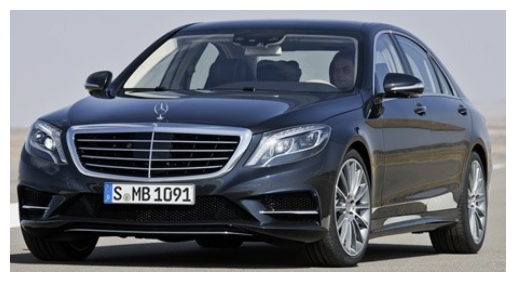

In [ ]:
img = cv2.imread('./1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

### bilateral filter 적용하기

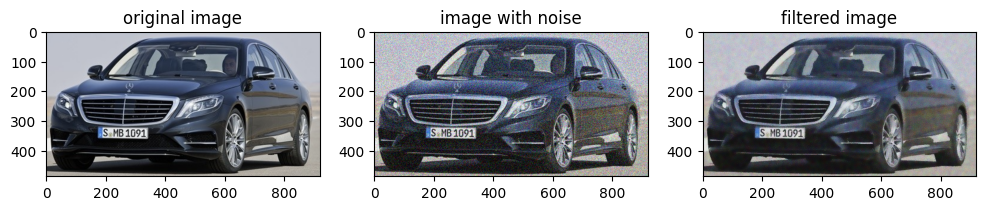

In [ ]:
noise_img = img.copy()
noise_img = np.clip((img / 255 + np.random.normal(scale=0.2, size=img.shape)) * 255, 0, 255).astype('uint8')
# write your code here
filtered_img = cv2.bilateralFilter(noise_img, d=17, sigmaColor=120, sigmaSpace = 300)
#d: 각 픽셀 주변에서 고려할 이웃 픽셀을 지정. 17 * 17
#sigmaColor: 색 공간에서 시그마 값. 숫자가 크면 색상 차이가 커도 서로 영향을 미치며 필터링 됨
#       ㄴ> 색상 차이가 명확할 때도 색상들이 혼합되어 스무딩되는 정도 높아짐
#sigmaSpace: 픽셀이 서로 물리적으로 멀리 떨어져 있어도 영향을 줄 수 있음.
#       ㄴ> 이미지의 스무딩 정도가 높아짐

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('image with noise')
plt.imshow(noise_img)
plt.subplot(1,3,3)
plt.title('filtered image')
plt.imshow(filtered_img)
plt.show()
#참고: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html

### sharpening filter 적용하기

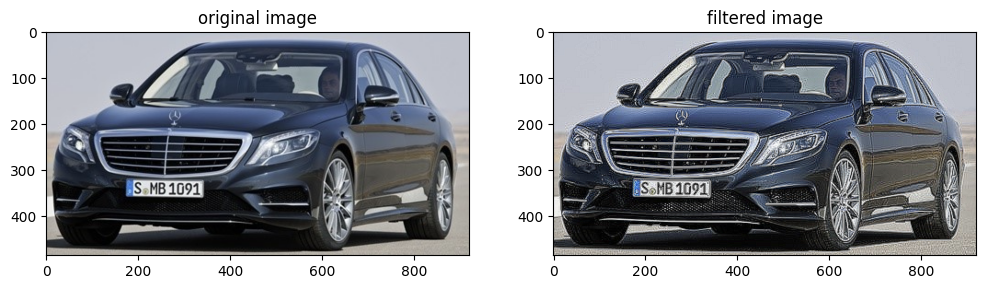

In [ ]:
img2 = img.copy()

# write your code here
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
#커널에 따라 filter가 달라진다
filtered_img2 = cv2.filter2D(img2, -1, kernel)
#                                    ㄴ> 출력이미지의 깊이
#filter2D: 이미지에 2D필터링을 적용할 때 사용

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img2)
plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(filtered_img2)
plt.show()

#참고: https://hunseop2772.tistory.com/221

## 9) Motion Blur filtering 적용하기

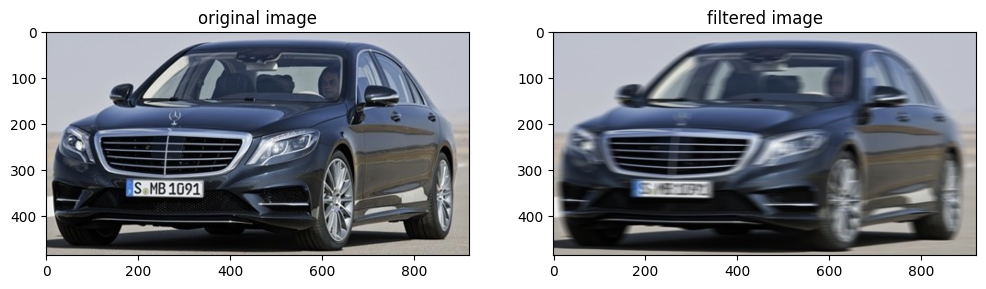

In [82]:
img3 = img.copy()

# write your code here
kernel_size = 20 #커널 사이즈 지정 20*20
kernel = np.zeros((kernel_size, kernel_size)) #20 * 20 크기 배열을 0으로 초기화

kernel[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
#커널의 중간행을 1로 채우기. -> 가운데 행만 활성화 되어 수평 방향 픽셀에 영향을 줌
kernel /= kernel_size #커널 크기로 나누어 평균화 필터 생성

filtered_img3 = cv2.filter2D(img3, -1, kernel)


plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img3)
plt.subplot(1,2,2)
plt.title('filtered image')
plt.imshow(filtered_img3)
plt.show()
#참고: https://www.geeksforgeeks.org/opencv-motion-blur-in-python/

## 10) feature extracting(cornerharris)

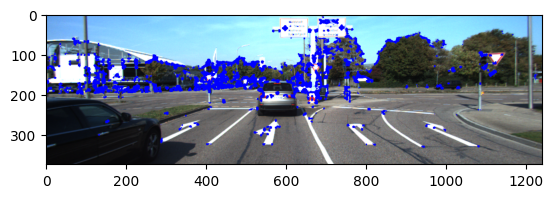

In [92]:
img = cv2.imread('./3.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)

# write your code
dst = cv2.cornerHarris(gray_img, 6, 3, 0.04)
#                                ㄴ> 고려할 주변 픽셀 범위
img[dst > 0.01*dst.max()] = [255, 0, 0]
# 원본이미지에서 0.01*dst.max()를 넘으면 파란색으로 표시하기

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #색상 바꿔주기

plt.imshow(img)
plt.show()

#참고: https://blog.naver.com/samsjang/220637582963
#https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345